# **COURSERA MACHINE LEARNING** #
## *Python Edition* ## 
## *Ex.2 - Logistic Regression* ##
***A Jupyter Notebook by Cristiano Esposito ©2021***



In the next section we'll first import all the libraries needed for further use

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

Now we define the main functions that will be used for later computations.

In [2]:
# define plot visualization function
def plotData(X, y):
    pos = np.where(y == 1)
    neg = np.where(y == 0)
    plt.scatter(X[pos, 0], X[pos, 1], marker='o', c='b')
    plt.scatter(X[neg, 0], X[neg, 1], marker='x', c='y')
    plt.title("Exams Results")
    plt.xlabel("Exam 1 score")
    plt.ylabel("Exam 2 score")
    plt.legend(['Admitted', 'Not Admitted'])
    plt.show()


In [3]:
# define function to plot decision boundary
def plotDecisionBoundary(theta, X, y):
    # compute values for decision boundary line
    x_values = [np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2]
    y_values = - (theta[0] + np.dot(theta[1], x_values)) / theta[2]
    plt.plot(x_values, y_values, label='Decision Boundary', c='g')
    pos = np.where(y == 1)
    neg = np.where(y == 0)
    plt.scatter(X[pos, 0], X[pos, 1], marker='o', c='b', label='Admitted')
    plt.scatter(X[neg, 0], X[neg, 1], marker='x', c='y', label='Not admitted')
    plt.title("Exams Results")
    plt.xlabel("Exam 1 score")
    plt.ylabel("Exam 2 score")
    plt.legend()
    plt.show()

In [4]:
# define Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [5]:
# define Cost Function and Gradient for Logistic Regression
def lrcostFunction(theta, X, y):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    J = 1 / m * np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h))
    return J

In [6]:
# define Gradient for Logistic Regression
def gradient(theta, X, y):
    m = len(y)
    return (1 / m) * np.dot(X.T, (sigmoid(np.dot(X, theta))) - y)

In [7]:
# define prediction function
def predict(theta, X):
    h = sigmoid(np.dot(X, theta))
    p = (h >= 0.5)
    return p

We'll now load data from external dataset and put values in appropriate arrays.

In [8]:
# import data from external file
X1, X2, y = np.loadtxt('./data/ex2data1.txt', delimiter=',', unpack=True)
X1 = X1.reshape(-1, 1)
X2 = X2.reshape(-1, 1)
y = y.reshape(-1, 1)
X = np.concatenate((X1, X2), axis=1)

Let's now show our training data on a scatter plot.

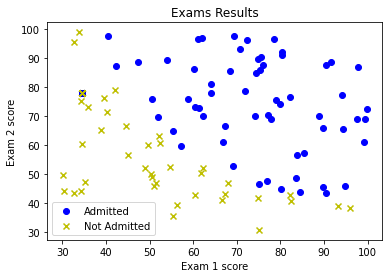

In [9]:
# show scatter plot
plotData(X, y)

Let's do some data wrangling on our training set

In [10]:
# define size of matrix X
(m, n) = np.shape(X)

# add intercept to training data
X = np.concatenate((np.ones((m, 1)), X), axis=1)

Let's do some initial and test computation on the Cost Function for logistic regression, using an initial theta and a test theta.

In [11]:
# Compute cost with initial theta (zeros)
initial_theta = np.zeros(((n + 1), 1))
cost = lrcostFunction(initial_theta, X, y)
grad = gradient(initial_theta, X, y)
print('Cost at initial theta (zeros): ', cost)
print('Gradient at initial theta (zeros): \n', grad)

# Compute cost with non-zero test theta
test_theta = [[-24], [0.2], [0.2]]
cost = lrcostFunction(test_theta, X, y)
grad = gradient(test_theta, X, y)
print('Cost at test theta: ', cost)
print('Gradient at test theta: \n', grad)

Cost at initial theta (zeros):  0.6931471805599453
Gradient at initial theta (zeros): 
 [[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]
Cost at test theta:  0.21833019382659774
Gradient at test theta: 
 [[0.04290299]
 [2.56623412]
 [2.64679737]]


Now we use an optimization function, provided by the Scipy library, to mimize cost finding the optimal theta values.

In [12]:
# Compute optimal theta using optimization function fmin_tnc
# where func is our cost function and fprime is the gradient function
result = opt.fmin_tnc(func=lrcostFunction, fprime=gradient, x0=initial_theta, args=(X, y.flatten()))
theta = result[0]
print('Optimal theta found: \n', theta)
theta_opt = theta.reshape(-1, 1)
print('Cost for optimal theta is: \n', lrcostFunction(theta_opt, X, y))

Optimal theta found: 
 [-25.1613187    0.20623159   0.20147149]
Cost for optimal theta is: 
 0.2034977015894742


In the next section we'll predict admission probability for a student given two exam's results. We'll also compute the accurancy of our model.

In [13]:
# Ask user to input new exam results to predict an admission
print('Insert new exam scores to predict admission.')
exam1_new = int(input('Exam1 score: \n'))
exam2_new = int(input('Exam2 score: \n'))
scores = np.array((1, exam1_new, exam2_new))
prob = sigmoid(np.dot(scores, theta))
print('For a student with score ', exam1_new, ' on exam 1 and score ', exam2_new, ' on exam 2, we predict an '
                                                                                  'admission probability of ',
      round(prob * 100, 2), '%')

# Check for train accurancy
p = predict(theta, X)
print('Train Accurancy: ', np.mean((p == y.flatten()) * 100))

Insert new exam scores to predict admission.


Exam1 score: 
 45
Exam2 score: 
 85


For a student with score  45  on exam 1 and score  85  on exam 2, we predict an admission probability of  77.63 %
Train Accurancy:  89.0


And now let's plot the decision boundary on top of our training set.

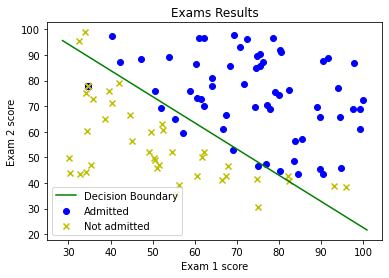

In [14]:
# Plot DecisionBoundary
plotDecisionBoundary(theta, X[:, 1:3], y)